In this notebook we show plotting of some numerical sensor data

In [1]:
!pip show HASS-data-detective|grep Version

Version: 1.0


In [2]:
import detective.core as detective
import pandas as pd
%matplotlib inline
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'

In [3]:
%%time
db = detective.HassDatabase('sqlite:///data/home-assistant_v2.db') 

Successfully connected to database sqlite:///data/home-assistant_v2.db
There are 5 entities with data
CPU times: user 9.86 ms, sys: 4.82 ms, total: 14.7 ms
Wall time: 17.2 ms


In [4]:
%%time
db.fetch_all_data()

Querying the database, this could take a while
master_df created successfully.
CPU times: user 20.8 ms, sys: 9.55 ms, total: 30.3 ms
Wall time: 48.7 ms


In [5]:
db.entities['sensor']

['sensor.merton',
 'sensor.particles_01um',
 'sensor.particles_025um',
 'sensor.particles_10um',
 'sensor.serial_sensor']

In [6]:
from detective.core import NumericalSensors
numerical_sensors = NumericalSensors(db.master_df)

In [7]:
numerical_sensors.data.head()

entity,sensor.particles_01um,sensor.particles_025um,sensor.particles_10um
last_changed,,,
2018-12-04 09:36:08.602089,81.0,106.0,115.0
2018-12-04 09:36:09.548357,82.0,106.0,115.0
2018-12-04 09:36:09.548566,82.0,107.0,115.0
2018-12-04 09:36:09.548759,82.0,107.0,119.0
2018-12-04 09:36:12.128323,83.0,107.0,119.0


In [8]:
numerical_sensors.entities

['sensor.particles_10um', 'sensor.particles_025um', 'sensor.particles_01um']

We can get the summary stats for a single sensor

In [9]:
numerical_sensors.data['sensor.particles_10um'].describe()

count    1069.000000
mean      136.713751
std        22.908636
min       107.000000
25%       120.000000
50%       137.000000
75%       146.000000
max       254.000000
Name: sensor.particles_10um, dtype: float64

We have a helper function `correlations()` to calculate the correlation between sensors

In [10]:
numerical_sensors.correlations()[:3] # top 3 correlations

,value
sensor.particles_025um-sensor.particles_10um,0.958906
sensor.particles_01um-sensor.particles_025um,0.954635
sensor.particles_01um-sensor.particles_10um,0.861816


We use a convenience function to plot these sensors, but the function is a bit limited

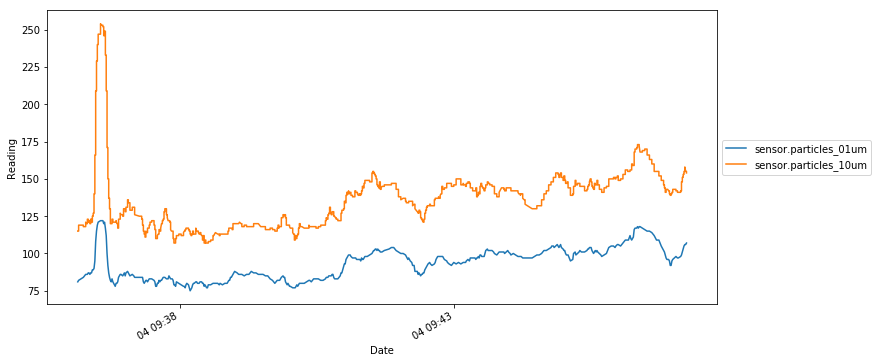

In [11]:
entities = ['sensor.particles_01um',
            'sensor.particles_10um']

numerical_sensors.plot(entities)

We can create the same plot directly

Text(0,0.5,'Reading')

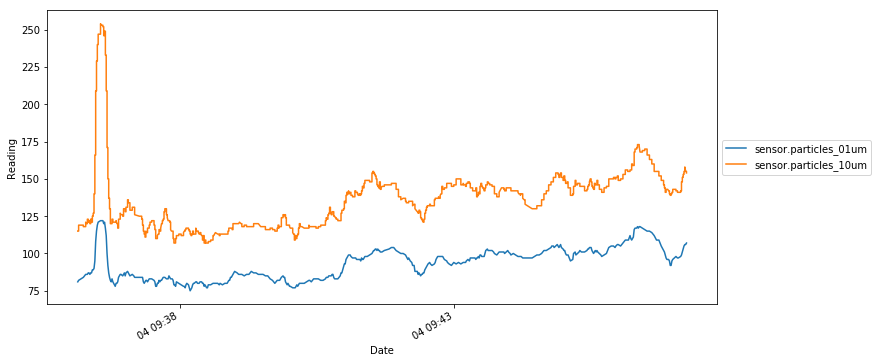

In [12]:
ax = numerical_sensors.data[entities].plot(figsize=[12, 6])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Date")
ax.set_ylabel("Reading")

We can filter the daterange of data shown using the `.loc` attribute of the dataframe

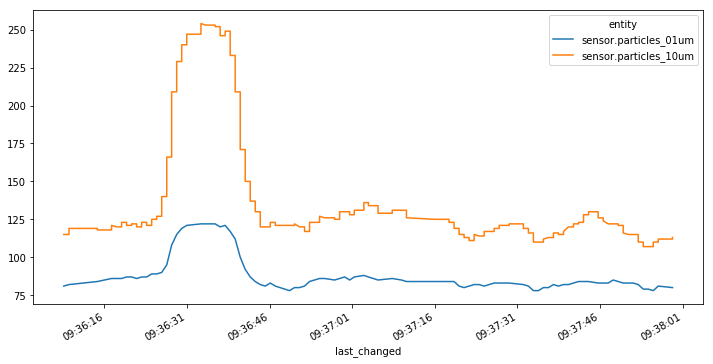

In [13]:
numerical_sensors.data[entities].loc['2018-12-04 09:36:00':'2018-12-04 9:38:00'].plot(figsize=[12, 6]);